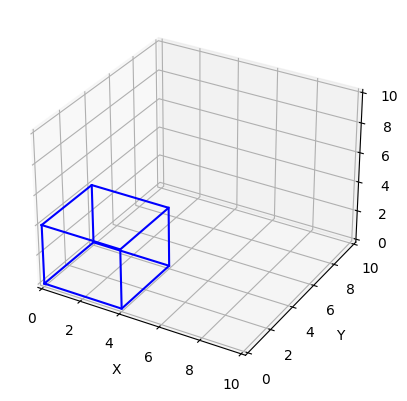

(0.0, 2, 4.0, 0.0, 3, 4.0, 0.0, 2, 4.0)


True

In [264]:
class Shapes:

    def __init__(self, x, y):
        self.x = x
        self.y = y


    @property
    def area(self):
        return self._area


    @property
    def circumference(self):
        return self._circumference


    @property
    def volume(self):
        return self._volume


    def draw_figure(self):
        import matplotlib.pyplot as plt
        import matplotlib.patches as patches

        fig, axes = plt.subplots()

        if isinstance(self, Circle):
            circle = plt.Circle( (self.x, self.y), self.radius, fill = False, color='blue' )

            axes.set_aspect( 1 )
            axes.add_artist( circle )

        elif isinstance(self, Rectangle):
            rectangle = patches.Rectangle((self.x - self.side2/2, self.y - self.side/2), self.side2, self.side, fill=False, color='blue')
            axes.add_patch(rectangle)

        plt.xlim( 0, 10 )
        plt.ylim( 0, 10 )

        plt.show()
        #ChatGPT automatic reponse när jag googlade "plot rectangle matplotlib"

    def is_inside_edge(self, x, y, z=None):

        figure_x = self.x
        figure_y = self.y
        side = self.side/2

        if z is not None: # z=0 tolkas som z=None
            figure_z = self.z

            coord_x1 = figure_x - side 
            coord_x2 = figure_x + side
            coord_y1 = figure_y - side
            coord_y2 = figure_y + side
            coord_z1 = figure_z - side 
            coord_z2 = figure_z + side 

            print(f"{coord_x1, x, coord_x2, coord_y1, y, coord_y2, coord_z1, z, coord_z2}")
            return coord_x1 < x < coord_x2 and coord_y1 < y < coord_y2 and coord_z1 < z < coord_z2

        else:

            side2 = self.side2/2 
    
            coord_x1 = figure_x - side2
            coord_x2 = figure_x + side2
            coord_y1 = figure_y - side
            coord_y2 = figure_y + side

            return coord_x1 < x < coord_x2 and coord_y1 < y < coord_y2

    def is_inside_curve(self, x, y, z=None):

        figure_x = self.x
        figure_y = self.y

        if z is not None:
            figure_z = self.z
            distance = ((x - figure_x) ** 2 + (y - figure_y) ** 2 + (z - figure_z) ** 2) ** 0.5

        else:
            distance = ((x - figure_x) ** 2 + (y - figure_y) ** 2) ** 0.5

        return distance < self.radius
    
    #Chat GPT query:
    # This is my code to check if a point (x,y) falls wihtin area of a rectangle
    # how can I rewrite the code to check if point falls within a circle? 
    # How would this function look to check if point falls within a sphere?

    def translate(self, x, y, z=None):
        try:
            x = float(x)
            y = float(y)
            z = float(y) if z else None
            
        except ValueError:
            print("Sorry, you can only input numbers.")
        
        else:
            self.x = x
            self.y = y
            self.z = z if z else None


    def __repr__(self):
        return f"Shapes(x={self.x}, y={self.y})"


    def __str__(self):
        return f"Shapes(x={self.x}, y={self.y})"


    def __eq__(self, obj):
        return type(self)  == type(obj)


    def __le__(self, object):
        return f"Area:{self.area <= object.area}. Circumference:{self.circumference <= object.circumference}"


    def __ge__(self, object):
        return f"Area:{self.area >= object.area}. Circumference:{self.circumference >= object.circumference}"


    def __lt__(self, object):
        return f"Area:{self.area < object.area}. Circumference:{self.circumference < object.circumference}"


    def __gt__(self, object):
        return f"Area:{self.area > object.area}. Circumference:{self.circumference > object.circumference}"


##############################
class Rectangle(Shapes):

    def __init__(self, x, y, side=None, side2=None, area=None, circumference=None):
        super().__init__(x, y)

        self.side = side
        self.side2 = side2
        self._area = side*side2
        self._circumference = 2 * (side + side2)


    def is_square(self):
        return self.side==self.side2


    def __repr__(self):
        return f"Rectangle(x={self.x}, y={self.y}, side={self.side}, side2={self.side2}, area={self.area}, circumference={self.circumference})"


    def __str__(self):
        return f"Rectangle(x={self.x}, y={self.y}, side={self.side}, side2={self.side2}, area={self.area}, circumference={self.circumference})"


##############################
class Cube(Rectangle):
    
    def __init__(self, x, y, z, side=None, volume=None):
        super().__init__(x, y, z, side)

        self.z = z
        self.side = side
        self._volume = pow(side,3)


    def draw_figure(self):
        import matplotlib.pyplot as plt

        center = (self.x, self.y, self.z)  # Change these coordinates as needed
        side = self.side
        half_side = side / 2

        vertices = [
            [center[0] - half_side, center[1] - half_side, center[2] - half_side],
            [center[0] + half_side, center[1] - half_side, center[2] - half_side],
            [center[0] + half_side, center[1] + half_side, center[2] - half_side],
            [center[0] - half_side, center[1] + half_side, center[2] - half_side],
            [center[0] - half_side, center[1] - half_side, center[2] + half_side],
            [center[0] + half_side, center[1] - half_side, center[2] + half_side],
            [center[0] + half_side, center[1] + half_side, center[2] + half_side],
            [center[0] - half_side, center[1] + half_side, center[2] + half_side]
        ]

        edges = [ [0, 1, 2, 3, 0], [4, 5, 6, 7, 4],
                [0, 4], [1, 5], [2, 6], [3, 7] ]

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        for edge in edges:
            ax.plot([vertices[i][0] for i in edge],
                    [vertices[i][1] for i in edge],
                    [vertices[i][2] for i in edge], 'blue')

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)
        ax.set_zlim(0, 10)

        plt.show()
        #Chat GPT: 
        # "show me a code to plot a cube in matplotlib with side 2 and that takes x,y and z coordinates without changing any of the axes"


    def __repr__(self):
        return f"Cube(x={self.x}, y={self.y}, z={self.z}, side={self.side}, volume={self.volume})"


    def __str__(self):
        return f"Cube(x={self.x}, y={self.y}, z={self.z}, side={self.side}, volume={self.volume})"


##############################
class Circle(Shapes):
    
    import math
    pi = math.pi

    def __init__(self, x, y, radius=None, area=None, circumference=None):
        super().__init__(x, y)

        self.radius = radius
        self._area = self.pi * pow(radius, 2)
        self._circumference = 2 * self.pi * radius


    def is_unit_circle(self):
        return self.radius == 1


    def __repr__(self):
        return f"Circle(x={self.x}, y={self.y}, radius={self.radius}, area={self.area}, circumference={self.circumference})"


    def __str__(self):
        return f"Circle(x={self.x}, y={self.y}, radius={self.radius}, area={self.area}, circumference={self.circumference})"



class Sphere(Circle):

    def __init__(self, x, y, z, radius=None, volume=None):
        super().__init__(x, y, z, radius)

        self.z = z
        self.radius = radius
        self._volume = (4/3) * self.pi * pow(radius, 3)


    def draw_figure(self):
        import matplotlib.pyplot as plt
        import numpy as np

        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        # Sphere parameters
        radius = self.radius
        center_x, center_y, center_z = self.x, self.y, self.z

        # Make data for a sphere
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        x = center_x + radius * np.outer(np.cos(u), np.sin(v))
        y = center_y + radius * np.outer(np.sin(u), np.sin(v))
        z = center_z + radius * np.outer(np.ones(np.size(u)), np.cos(v))

        # Plot the surface of the sphere
        ax.plot_surface(x, y, z, color='b')

        ax.set_xlim([0, 7.5])  # Set x-axis limits
        ax.set_ylim([0, 7.5])  # Set y-axis limits
        ax.set_zlim([0, 7.5])  # Set z-axis limits

        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.set_zlabel('Z-axis')

        # Set an equal aspect ratio
        ax.set_aspect('equal')

        plt.show()
        # https://www.tutorialspoint.com/plotting-points-on-the-surface-of-a-sphere-in-python-s-matplotlib


    def __repr__(self):
        return f"Sphere(x={self.x}, y={self.y}, z={self.z}, radius={self.radius}, volume={self.volume})"


    def __str__(self):
        return f"Sphere(x={self.x}, y={self.y}, z={self.z}, radius={self.radius}, volume={self.volume})"

#############################################

ci = Circle(2, 1, radius=1)
sp = Sphere(2,1,1, radius=1)

cu = Cube(2,2,2, side=4)
rec = Rectangle(3,2, side=1, side2=2)


cu.draw_figure()
cu.is_inside_edge(2,3,2)

#sp.draw_figure()
#sp.is_inside(2.9,0.1,1)

In [199]:
def aaa(x, y=None):

    d = "yes" if y != None else "no"
    
    print(d)

aaa(1, 0)


yes


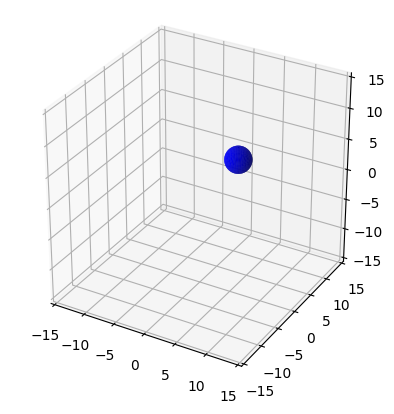

In [3]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Sphere parameters
radius = 2
center_x, center_y, center_z = 4, 4, 4

# Make data for a sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = center_x + radius * np.outer(np.cos(u), np.sin(v))
y = center_y + radius * np.outer(np.sin(u), np.sin(v))
z = center_z + radius * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface of the sphere
ax.plot_surface(x, y, z, color='b')

ax.set_xlim([-15, 15])  # Set x-axis limits
ax.set_ylim([-15, 15])  # Set y-axis limits
ax.set_zlim([-15, 15])  # Set z-axis limits

# Set an equal aspect ratio
ax.set_aspect('equal')


plt.show()


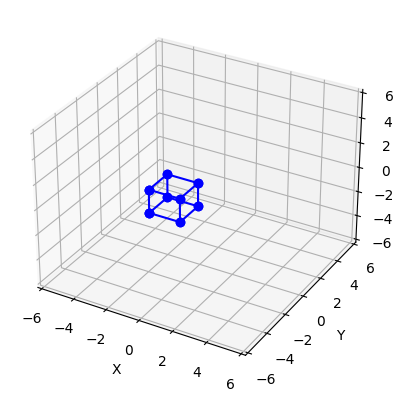

In [1]:
import matplotlib.pyplot as plt

def plot_cube(center, side):
    half_side = side / 2

    vertices = [
        [center[0] - half_side, center[1] - half_side, center[2] - half_side],
        [center[0] + half_side, center[1] - half_side, center[2] - half_side],
        [center[0] + half_side, center[1] + half_side, center[2] - half_side],
        [center[0] - half_side, center[1] + half_side, center[2] - half_side],
        [center[0] - half_side, center[1] - half_side, center[2] + half_side],
        [center[0] + half_side, center[1] - half_side, center[2] + half_side],
        [center[0] + half_side, center[1] + half_side, center[2] + half_side],
        [center[0] - half_side, center[1] + half_side, center[2] + half_side]
    ]

    edges = [
        [0, 1, 2, 3, 0],
        [4, 5, 6, 7, 4],
        [0, 4],
        [1, 5],
        [2, 6],
        [3, 7]
    ]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for edge in edges:
        ax.plot([vertices[i][0] for i in edge],
                [vertices[i][1] for i in edge],
                [vertices[i][2] for i in edge], 'bo-')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_xlim(-3*side, 3*side)
    ax.set_ylim(-3*side, 3*side)
    ax.set_zlim(-3*side, 3*side)

    plt.show()

center = (-4, 4, -5)  # Change these coordinates as needed
side = 2

plot_cube(center, side)

#Chat GPT: 
# "show me a code to plot a cube in matplotlib with side 2 and that takes x,y and z coordinates without changing any of the axes"


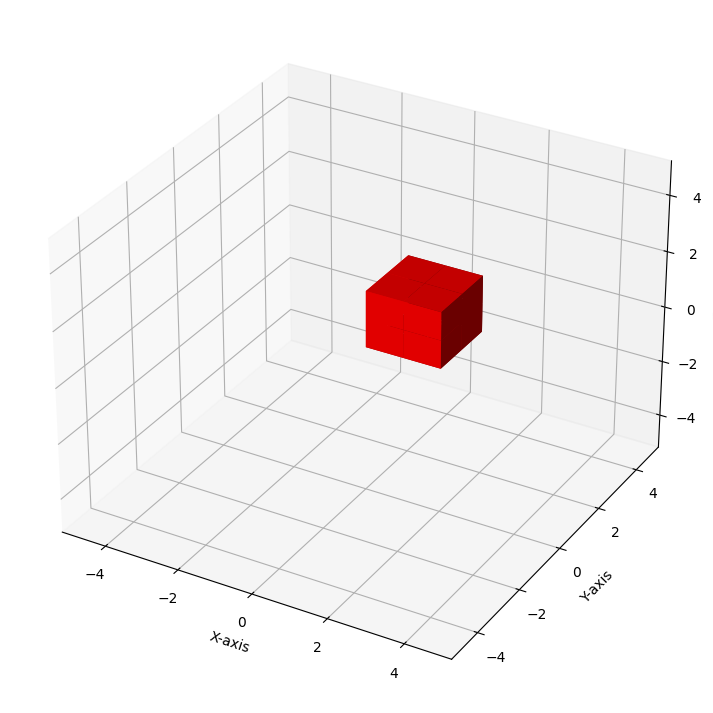

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def cubes(side, x_center=0, y_center=0, z_center=0):

    side = int(side/2)

    data = np.ones([side, side, side])

    fig = plt.figure(figsize=(9, 9))

    ax = fig.add_subplot(111, projection='3d')

    ax.voxels(data, facecolors="red")

    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_zlim([-10, 10])

    # Set the cube's center position
    ax.set_xbound(lower=x_center - 5, upper=x_center + 5)
    ax.set_ybound(lower=y_center - 5, upper=y_center + 5)
    ax.set_zbound(lower=z_center - 5, upper=z_center + 5)

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.show()

# You can change the position of the cube by specifying the x, y, and z coordinates.
cubes(side=2, x_center=0, y_center=0, z_center=0)


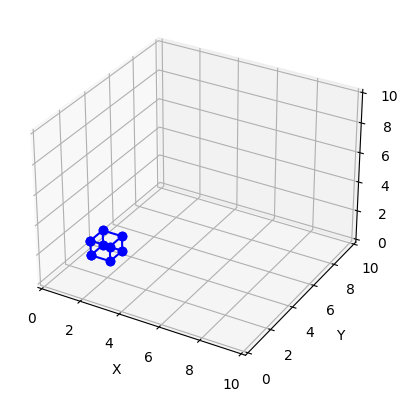

In [81]:
import matplotlib.pyplot as plt

def draw_figure():
    # Define the center point and side length of the cube
    center = (2, 2, 2)
    side = 1
    half_side = side / 2

    vertices = [
        [center[0] - half_side, center[1] - half_side, center[2] - half_side],
        [center[0] + half_side, center[1] - half_side, center[2] - half_side],
        [center[0] + half_side, center[1] + half_side, center[2] - half_side],
        [center[0] - half_side, center[1] + half_side, center[2] - half_side],
        [center[0] - half_side, center[1] - half_side, center[2] + half_side],
        [center[0] + half_side, center[1] - half_side, center[2] + half_side],
        [center[0] + half_side, center[1] + half_side, center[2] + half_side],
        [center[0] - half_side, center[1] + half_side, center[2] + half_side]
    ]

    edges = [[0, 1, 2, 3, 0], [4, 5, 6, 7, 4],
             [0, 4], [1, 5], [2, 6], [3, 7]]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for edge in edges:
        ax.plot([vertices[i][0] for i in edge],
                [vertices[i][1] for i in edge],
                [vertices[i][2] for i in edge], 'bo-')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_xlim(0, 10)  # Set X-axis limits to 0 to 10
    ax.set_ylim(0, 10)  # Set Y-axis limits to 0 to 10
    ax.set_zlim(0, 10)  # Set Z-axis limits to 0 to 10

    plt.show()

# Call the function to draw the cube
draw_figure()
